# Packages

In [17]:
# --- Core data handling
import pandas as pd 
import numpy as np 
import pyarrow 

# --- Visualizations
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from matplotlib.ticker import FuncFormatter
import seaborn as sns 

# --- Statistics and Modeling
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

# Data information

In [18]:
trips_amount = pd.read_csv (r"c:\Users\juand\OneDrive\Escritorio\TripleTen\Sprint 8\Zuber-Impact-of-Weather-and-Other-External-Factors\datasets\moved_project_sql_result_01.csv")
drop_off = pd.read_csv (r"C:\Users\juand\OneDrive\Escritorio\TripleTen\Sprint 8\Zuber-Impact-of-Weather-and-Other-External-Factors\datasets\moved_project_sql_result_04.csv")
trips_air = pd.read_csv (r"C:\Users\juand\OneDrive\Escritorio\TripleTen\Sprint 8\Zuber-Impact-of-Weather-and-Other-External-Factors\datasets\moved_project_sql_result_07.csv")

In [19]:
trips_amount.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [20]:
drop_off.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [21]:
trips_air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


# EDA

In [22]:
print (drop_off.sort_values(by= 'average_trips', ascending= False).head(10))

  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000
5             Lake View    2420.966667
6            Grant Park    2068.533333
7         Museum Campus    1510.000000
8            Gold Coast    1364.233333
9    Sheffield & DePaul    1259.766667


In [23]:
top_trips= trips_amount.sort_values (by= 'trips_amount', ascending= False).head(10)

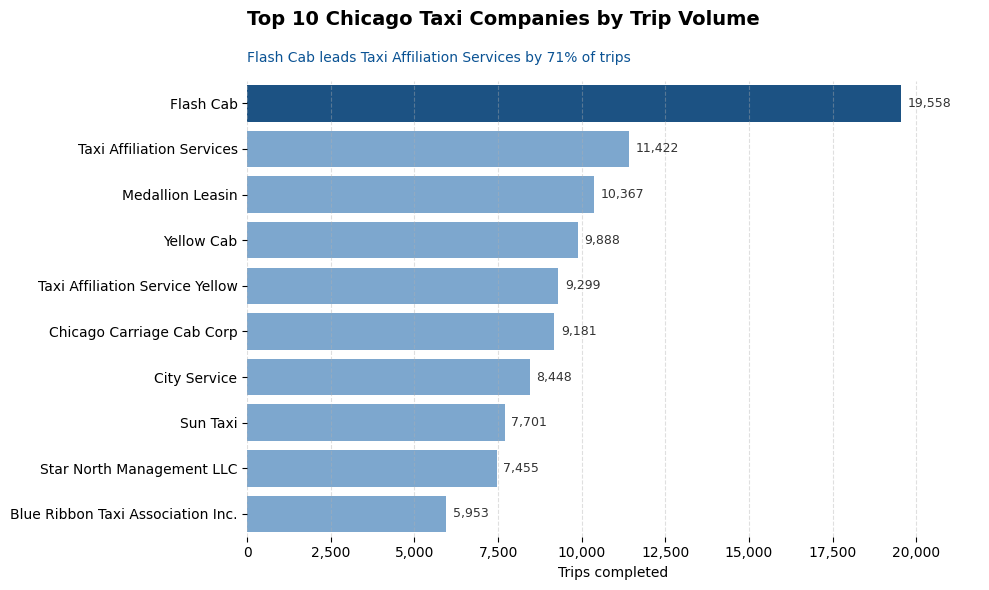

In [24]:
leader = top_trips.iloc[0]
runner_up = top_trips.iloc[1]
lift_pct = (leader['trips_amount'] / runner_up['trips_amount'] - 1) * 100

palette = [
    '#0b5394' if company == leader['company_name'] else '#6fa8dc'
    for company in top_trips['company_name']
]

plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=top_trips,
    y='company_name',
    x='trips_amount',
    palette=palette
)

max_value = top_trips['trips_amount'].max()
label_offset = max_value * 0.01

for bar in ax.patches:
    width = bar.get_width()
    y = bar.get_y() + bar.get_height() / 2
    ax.text(width + label_offset, y, f'{width:,.0f}', va='center', fontsize=9, color='#333333')

ax.set_xlabel('Trips completed')
ax.set_ylabel('')
ax.set_xlim(0, max_value * 1.12)
ax.set_title('Top 10 Chicago Taxi Companies by Trip Volume', fontsize=14, pad=40, loc='left', weight= 'bold')
ax.text(
    0,
    1.04,
    f"{leader['company_name']} leads {runner_up['company_name']} by {lift_pct:.0f}% of trips",
    transform=ax.transAxes,
    fontsize=10,
    color='#0b5394'
)
ax.xaxis.grid(True, linestyle='--', alpha=0.4)
ax.xaxis.set_major_formatter(FuncFormatter(lambda value, _: f'{int(value):,}'))
sns.despine(left=True, bottom=True)
plt.tight_layout()


**Takeaways**
- Flash Cab completes 19,558 trips - about 71% more rides than Taxi Affiliation Services, the next largest fleet.
- The top three fleets capture 42% of rides among the top ten operators, indicating a concentrated market.
- Partnering with the top four companies would cover roughly half of observed taxi trips in the dataset.


In [25]:
top_neighborhood = drop_off.sort_values(by= 'average_trips', ascending= False).head(10)

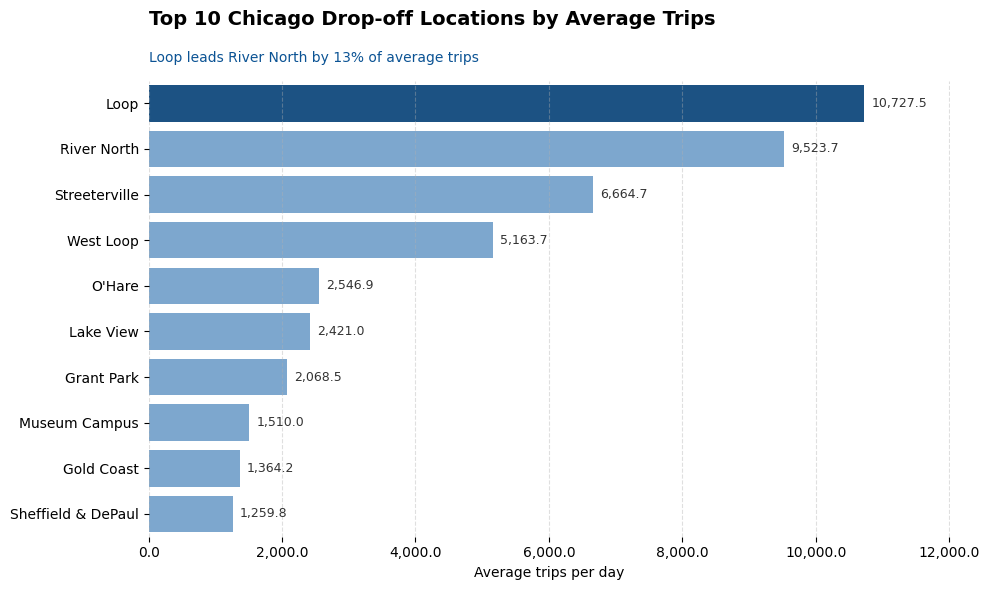

In [26]:
# Select the leading drop-off location by average trips
leader_n = top_neighborhood.iloc[0]
# Capture the second strongest drop-off location for comparison
runner_up_n = top_neighborhood.iloc[1]
# Calculate the leader's percentage lift over the runner-up
lift_pct_n = (leader_n['average_trips'] / runner_up_n['average_trips'] - 1) * 100

# Build a custom palette that highlights the top location
palette = [
    '#0b5394' if drop_location == leader_n['dropoff_location_name'] else '#6fa8dc'
    # Use a standout color for the leader and a softer tone for the rest
    for drop_location in top_neighborhood['dropoff_location_name']
    # Iterate through each drop-off location to assign a color
]

# Create the figure canvas with a presentation-friendly aspect ratio
plt.figure(figsize=(10, 6))
# Render a horizontal bar chart of average trips
ax = sns.barplot(
    # Supply the ranked neighborhood data
    data=top_neighborhood,
    # Map drop-off names to the y-axis for legible labels
    y='dropoff_location_name',
    # Map average trip counts to the x-axis to set bar lengths
    x='average_trips',
    # Apply the custom palette so the leader stands out
    palette=palette
)

# Capture the maximum average trips to guide axis scaling
max_value = top_neighborhood['average_trips'].max()
# Offset label text slightly beyond each bar for clear annotations
label_offset = max_value * 0.01

# Annotate each bar with its precise value
for bar in ax.patches:
    # Measure the bar width (average trips value)
    width = bar.get_width()
    # Find the vertical midpoint to center the text
    y = bar.get_y() + bar.get_height() / 2
    # Place a formatted label at the end of each bar
    ax.text(width + label_offset, y, f'{width:,.1f}', va='center', fontsize=9, color='#333333')

# Polish the axes and headings for a business-ready look
ax.set_xlabel('Average trips per day')
ax.set_ylabel('')
ax.set_xlim(0, max_value * 1.12)
ax.set_title('Top 10 Chicago Drop-off Locations by Average Trips', fontsize=14, pad=40, loc='left', weight='bold')
ax.text(
    # Anchor the subtitle at the top-left of the axes
    0,
    # Position just above the title
    1.04,
    # Summarize the leader advantage in percentage terms
    f"{leader_n['dropoff_location_name']} leads {runner_up_n['dropoff_location_name']} by {lift_pct_n:.0f}% of average trips",
    # Keep placement stable regardless of data scale
    transform=ax.transAxes,
    # Choose a readable subtitle size
    fontsize=10,
    # Tie the subtitle color to the highlighted bar
    color='#0b5394'
)
ax.xaxis.grid(True, linestyle='--', alpha=0.4)
ax.xaxis.set_major_formatter(FuncFormatter(lambda value, _: f'{value:,.1f}'))
sns.despine(left=True, bottom=True)
plt.tight_layout()


**Neighborhood Takeaways**
- Loop averages 10,727 daily drop-offs - about 13% more traffic than runner-up River North.
- Loop, River North, and Streeterville together account for roughly 62% of drop-offs among the top ten destinations.
- Covering the top five neighborhoods would address about 80% of the observed drop-off activity.
